In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score


In [1]:
df = pd.read_parquet("../data/btcusd_preprcd_2.parquet")


NameError: name 'pd' is not defined

In [ ]:
df.dropna(inplace=True)

In [ ]:
split = int(len(df) * 0.6)
train = df.iloc[:split]
rest = df.iloc[split:]

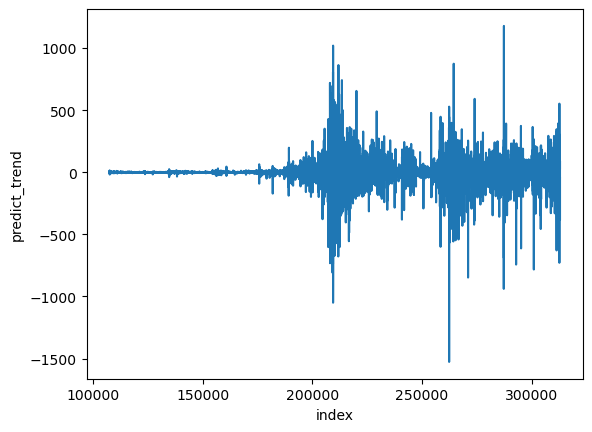

In [ ]:
train_reset = train.reset_index()
sns.lineplot(data=train_reset, x='index', y='predict_trend')
plt.show()

In [ ]:
split_rest = int(len(rest) * 0.5)
validation = rest.iloc[:split_rest]
test = rest.iloc[split_rest:]

In [ ]:
train_y = train[['predict_trend']]
train_x = train.drop(columns=['predict_trend'])
val_y = validation[['predict_trend']]
val_x = validation.drop(columns=['predict_trend'])
test_y = test[['predict_trend']]
test_x = test.drop(columns=['predict_trend'])

In [ ]:
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(train_x.shape[1],)),
#     Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
#     # Dropout(0.2),
#     Dense(64, activation='relu'),
#     # Dropout(0.2),
#     Dense(32, activation='relu'),
#     # Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')


Mean Squared Error: 41762.0546875


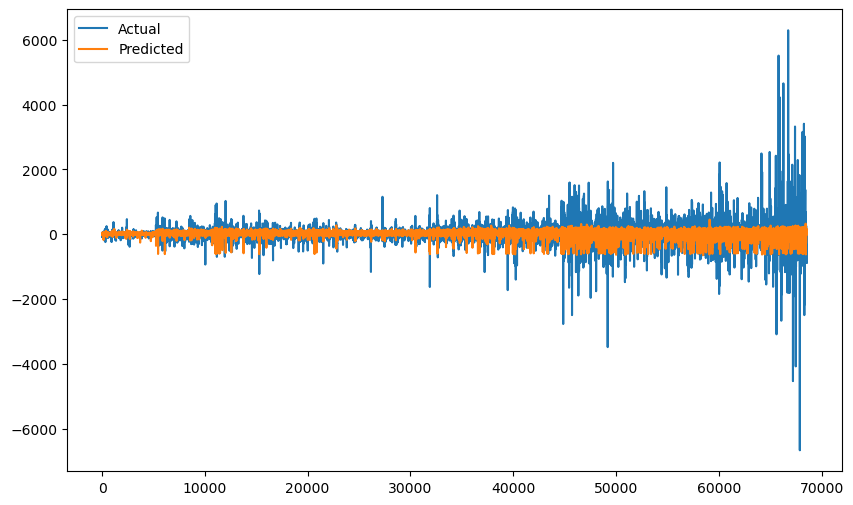

In [ ]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=12, random_state=42)

# Train the model
model.fit(train_x, train_y)

# Make predictions
y_pred = model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_y.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
threshold = 200

# Convert predictions and actual values to binary using the threshold
y_pred_binary = np.where(y_pred > threshold, 1, np.where(y_pred < -threshold, -1, 0))
y_test_binary = np.where(test_y > threshold, 1, np.where(test_y < -threshold, -1, 0))
# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8711423693695008


In [ ]:
y_test_binary_mod = y_test_binary%2
print(y_test_binary_mod.sum()/len(y_test_binary) * 100)

12.073015919338129


In [ ]:
# model.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), verbose=2)